# **Task 2 - Fraud Detection Pipeline**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import logging

In [2]:
# Add the 'scripts' directory to the Python path for module imports
scripts_path = os.path.abspath(os.path.join('..', 'scripts'))
sys.path.append(scripts_path)
print("✅ 'scripts' directory added to the Python path successfully!")

✅ 'scripts' directory added to the Python path successfully!


In [3]:
# Set max rows and columns to display for better visibility in outputs
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Log the configuration of display options
logging.info("📏 Maximum rows and columns set for better visibility in outputs.")
print("=======================================")
print("✅ Display options configured successfully!")

✅ Display options configured successfully!


In [4]:
# Configure logging
from logger import LoggerSetup  

# Initialize the logger for tracking the fraud detection pipeline
log_file_path = '../logs/fraud_detection_pipeline.log'
logger = LoggerSetup(log_file=log_file_path).get_logger()
print("============================================================================")
print("🔧 Logging system initialized for fraud detection pipeline.")

2025-02-10 11:31:20,026 - logger - INFO - Logger configured successfully.
INFO:logger:Logger configured successfully.


🔧 Logging system initialized for fraud detection pipeline.


In [5]:
# Import the DatasetLoader class for loading and preprocessing datasets
from data_loader import DatasetLoader 

In [6]:
# Create instances
print("📥 Loading the Fraud Dataset...")
load_fraud = DatasetLoader('../data/processed_fraud_data.csv', logger=logger)
print("✅ Fraud Dataset loaded successfully!")

print("📥 Loading the Credit Card Dataset...")
load_credit = DatasetLoader('../data/creditcard.csv', logger=logger)
print("✅ Credit Card Dataset loaded successfully!")

📥 Loading the Fraud Dataset...
✅ Fraud Dataset loaded successfully!
📥 Loading the Credit Card Dataset...
✅ Credit Card Dataset loaded successfully!


In [7]:
# Load the datasets
print("📂 Loading the Fraud Dataset...")
fraud_data = load_fraud.load_dataset().set_index('user_id')
print("✅ Fraud Dataset loaded and indexed by 'user_id'!")

print("📂 Loading the Credit Card Dataset...")
credit_data = load_credit.load_dataset()
print("✅ Credit Card Dataset loaded successfully!")

📂 Loading the Fraud Dataset...


2025-02-10 11:31:20,334 - logger - INFO - Dataset loaded successfully.
INFO:logger:Dataset loaded successfully.


✅ Fraud Dataset loaded and indexed by 'user_id'!
📂 Loading the Credit Card Dataset...


2025-02-10 11:31:21,774 - logger - INFO - Dataset loaded successfully.
INFO:logger:Dataset loaded successfully.


✅ Credit Card Dataset loaded successfully!


In [8]:
print("         📊 Overview of Credit Data (First 10 Rows):")
print("=====================================================================")
credit_data.head(10)

         📊 Overview of Credit Data (First 10 Rows):


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [9]:
print("         📊 Overview of Fraud Data (First 10 Rows)")
print("=====================================================================")
fraud_data.head(10)

         📊 Overview of Fraud Data (First 10 Rows)


,purchase_value,age,class,fraud_rate,hour_of_day,day_of_week,purchase_delay,user_transaction_frequency,device_transaction_frequency,user_transaction_velocity,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M
user_id,,,,,,,,,,,,,,,,,
247547,0.549607,-0.363124,0,-0.233869,-1.231124,1.487911,-0.413800,0.0,-0.259874,-0.232945,0.0,1.0,0.0,0.0,0.0,1.0,0.0
220737,-1.197335,0.101168,0,-1.259767,1.229002,-0.505034,-1.180852,0.0,-0.259874,-0.232943,0.0,1.0,0.0,0.0,0.0,0.0,0.0
390400,0.385831,-0.479197,0,-0.354204,1.663142,0.989675,-0.936126,0.0,0.116936,-0.232944,0.0,0.0,0.0,1.0,0.0,0.0,1.0
69592,0.986342,-0.363124,0,-0.354204,0.650149,0.989675,0.867086,0.0,-0.259874,-0.232946,1.0,0.0,0.0,0.0,0.0,0.0,0.0
174987,0.767974,0.449387,0,-1.259767,-1.086411,-1.003270,1.700633,0.0,-0.259874,-0.232946,0.0,1.0,0.0,0.0,0.0,0.0,0.0
23204,-0.651416,1.145825,0,-0.354204,-1.086411,1.487911,-0.269035,0.0,-0.259874,-0.232945,0.0,0.0,0.0,1.0,0.0,0.0,0.0
155230,0.003687,1.494044,0,-1.259767,0.216009,-0.006798,0.281576,0.0,-0.259874,-0.232945,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199369,0.331239,0.449387,0,0.121794,0.939575,1.487911,0.003344,0.0,0.116936,-0.232945,1.0,0.0,0.0,1.0,0.0,0.0,1.0
236894,-0.815192,-0.247051,0,0.121794,-1.520551,0.989675,-0.500649,0.0,-0.259874,-0.232945,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
# Understand the shapes
print("🔍 Understanding the Shapes of the Datasets:")
print(f"📊 Credit Data Shape: {credit_data.shape}")
print(f"📊 Fraud Data Shape: {fraud_data.shape}")

🔍 Understanding the Shapes of the Datasets:
📊 Credit Data Shape: (284807, 31)
📊 Fraud Data Shape: (129146, 17)


In [11]:
# Check for any missing values
print("🔍 Checking for Missing Values in Datasets:\n")
print("📊 Credit Data Missing Values:")
print(credit_data.isnull().sum())

print("📊 Fraud Data Missing Values:")
print(fraud_data.isnull().sum())

🔍 Checking for Missing Values in Datasets:

📊 Credit Data Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
📊 Fraud Data Missing Values:
purchase_value                  0
age                             0
class                           0
fraud_rate                      0
hour_of_day                     0
day_of_week                     0
purchase_delay                  0
user_transaction_frequency      0
device_transaction_frequency    0
user_transaction_velocity       0
source_Direct                   0
source_SEO                      0
browser_FireFox                 0
browser_IE                      0
browser_Opera                   0
br

### **Data Preparation**

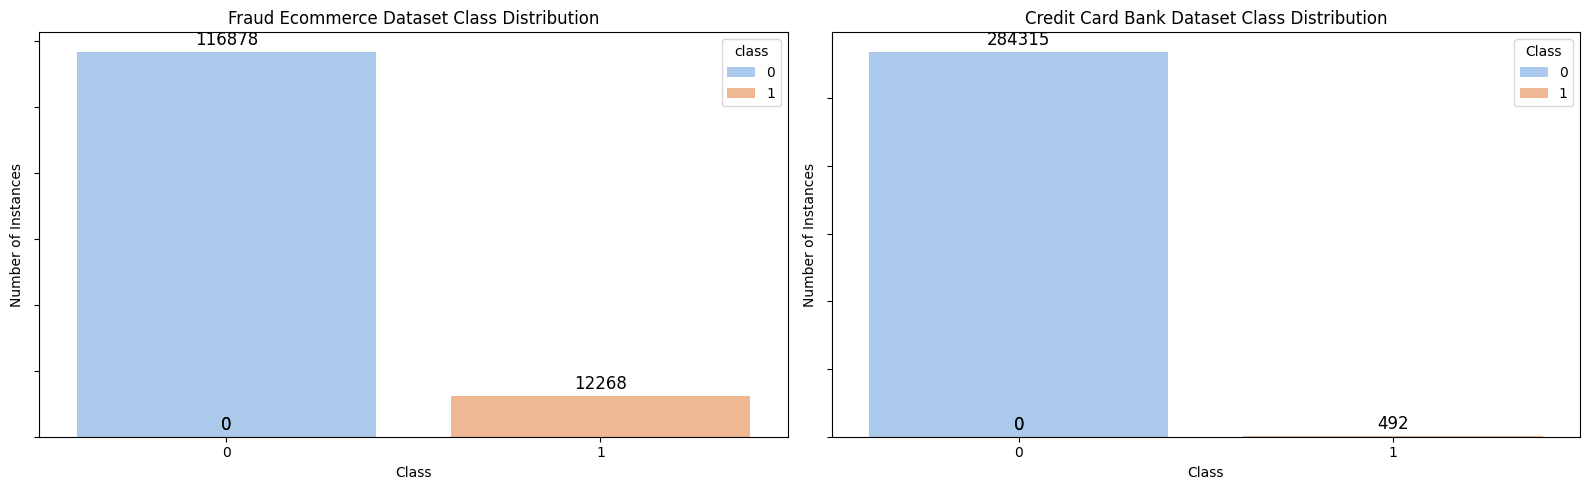

In [12]:
from fraud_detection_pipeline import visualize_class_distributions

# Load datasets
fraud_data = pd.read_csv("../data/processed_fraud_data.csv")
credit_data = pd.read_csv("../data/creditcard.csv")

# Visualize class distributions
visualize_class_distributions(fraud_data, credit_data)

### **Class Imbalance Summary**

**Fraud Ecommerce Dataset**
- **Class 0 (non-fraudulent)**: 116,878 instances
- **Class 1 (fraudulent)**: 12,268 instances
- **Imbalance**: Significant, with Class 1 underrepresented.

**Credit Card Bank Dataset**
- **Class 0**: 284,315 instances
- **Class 1**: 492 instances
- **Imbalance**: Extreme, posing serious challenges.

### **Implications**
- **Biased Models**: Models may favor the majority class, resulting in poor detection of fraud.
- **Underfitting/Overfitting**: Risk of models failing to generalize across classes.
- **Evaluation Challenges**: Traditional metrics like accuracy can be misleading.

### **Addressing Class Imbalance**
- **Oversampling**: Increase minority class instances (e.g., SMOTE).

In [13]:
from imblearn.over_sampling import SMOTE

# Function to apply SMOTE
def apply_smote(X_train, y_train):

    # Apply SMOTE to the training set
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    return X_resampled, y_resampled

**For creditcard dataset** (target column 'Class'):

+ Separate Features and Target
+ apply smote(class balancing technique)
+ Split into train and test sets

In [14]:
from data_preparation import DataPreparation

# Assuming df_creditcard is the DataFrame for the credit card dataset
print("🔄 Initializing Data Preparation...")
_creditcard = DataPreparation(credit_data, target_column='Class')

print("📊 Splitting the dataset into training and testing sets...")
_creditcard.train_test_split(test_size=0.2, random_state=42)

# Retrieving the train and test sets
X_train_cc, X_test_cc, y_train_cc, y_test_cc = _creditcard.get_train_test_data()

# Displaying the shapes of the resulting datasets
print("\n📋 Training and Testing Data Summary:")
print(f"🟢 Training Features Shape: {X_train_cc.shape}")
print(f"🔴 Testing Features Shape: {X_test_cc.shape}")
print(f"🟢 Training Target Shape: {y_train_cc.shape}")
print(f"🔴 Testing Target Shape: {y_test_cc.shape}")

# apply class balancing technique(SMOTE)

# For Credit Card Bank Dataset
X_credit_resampled, y_credit_resampled = apply_smote(X_train_cc, y_train_cc)

print("\nCredit Card Bank Dataset Class Distribution After SMOTE:")
print(pd.Series(y_credit_resampled).value_counts())

print("\n✅ Data preparation is complete! Ready for model training.")

🔄 Initializing Data Preparation...
📊 Splitting the dataset into training and testing sets...
Data split into training and testing sets successfully.

📋 Training and Testing Data Summary:
🟢 Training Features Shape: (227845, 30)
🔴 Testing Features Shape: (56962, 30)
🟢 Training Target Shape: (227845,)
🔴 Testing Target Shape: (56962,)

Credit Card Bank Dataset Class Distribution After SMOTE:
Class
0    227451
1    227451
Name: count, dtype: int64

✅ Data preparation is complete! Ready for model training.


**For Fraud_Data dataset** (target column 'class'):

+ Separate Features and Target
+ Split into train and test sets
+ Apply class balancing technique(SMOTE)

In [15]:
print("🔄 Initializing Data Preparation for Fraud Dataset...")
_fraud = DataPreparation(fraud_data, target_column="class")

print("📊 Splitting the Fraud Dataset into Training and Testing Sets...")
_fraud.train_test_split(test_size=0.2, random_state=42)

# Retrieving the train and test sets
X_train_fd, X_test_fd, y_train_fd, y_test_fd = _fraud.get_train_test_data()

# Displaying the shapes of the resulting datasets
print("\n📋 Fraud Dataset Train and Test Data Summary:")
print(f"🟢 Training Features Shape: {X_train_fd.shape}")
print(f"🔴 Testing Features Shape: {X_test_fd.shape}")
print(f"🟢 Training Target Shape: {y_train_fd.shape}")
print(f"🔴 Testing Target Shape: {y_test_fd.shape}")

# Apply class balancing technique(SMOTE)
X_fraud_resampled, y_fraud_resampled = apply_smote(X_train_fd, y_train_fd)
# Check the class distribution after SMOTE
print("Fraud Ecommerce Dataset Class Distribution After SMOTE:")
print(pd.Series(y_fraud_resampled).value_counts())

print("✅ Data preparation for Fraud Dataset is complete! Ready for model training.")

🔄 Initializing Data Preparation for Fraud Dataset...
📊 Splitting the Fraud Dataset into Training and Testing Sets...
Data split into training and testing sets successfully.

📋 Fraud Dataset Train and Test Data Summary:
🟢 Training Features Shape: (103316, 17)
🔴 Testing Features Shape: (25830, 17)
🟢 Training Target Shape: (103316,)
🔴 Testing Target Shape: (25830,)
Fraud Ecommerce Dataset Class Distribution After SMOTE:
class
0    93456
1    93456
Name: count, dtype: int64
✅ Data preparation for Fraud Dataset is complete! Ready for model training.


### Model Selection
- Import ModelPipeline class from model_pipeline
- Train multiple models
- hyperparameter tune
- evaluate the model
- compare the model

In [16]:
import os

# Disable GPU usage
print("🚫 Disabling GPU for this session...")
os.environ['CUDA_VISIBLE_DEVICES'] = '-1' 

# Import the Fraud Detection Pipeline class
print("📦 Importing the Fraud Detection Pipeline...")
from fraud_detection_pipeline import FraudDetectionPipeline
print("✅ Fraud Detection Pipeline imported successfully!")

🚫 Disabling GPU for this session...
📦 Importing the Fraud Detection Pipeline...
✅ Fraud Detection Pipeline imported successfully!


**Train and Evaluate the models on the e-commerce fruad dataset**


In [17]:
# Create an instance of the fraud detection pipeline
print("🔧 Creating an instance of the Fraud Detection Pipeline...")
model_pipeline = FraudDetectionPipeline(X_train_fd, X_test_fd, y_train_fd, y_test_fd)
print("✅ Instance created successfully!")

# Add models to the pipeline
# print("➕ Adding models to the pipeline...")
# model_pipeline.add_models()
# print("✅ Models added successfully!")

# Train and evaluate the models, logging with MLflow
print("📈 Training and Evaluating the Models...")
best_model, best_model_name = model_pipeline.train_and_evaluate()
print(f"🏆 Best Model: {best_model_name} selected.")

# Save the best model
print("💾 Saving the best model...")
model_pipeline.save_best_model(best_model, best_model_name, 'fraud')
print("✅ Best model saved successfully!")

🔧 Creating an instance of the Fraud Detection Pipeline...
✅ Instance created successfully!
📈 Training and Evaluating the Models...
Tuning Random Forest...
Best parameters for Random Forest: {'classifier__max_depth': 5, 'classifier__n_estimators': 50}
Tuning Gradient Boosting...
Best parameters for Gradient Boosting: {'classifier__learning_rate': 0.01, 'classifier__n_estimators': 100}
Random Forest trained in 2.56 seconds


2025/02/10 11:32:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'Random Forest' already exists. Creating a new version of this model...
Created version '2' of model 'Random Forest'.


Random Forest logged in MLflow
Gradient Boosting trained in 17.08 seconds


2025/02/10 11:33:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'Gradient Boosting' already exists. Creating a new version of this model...
Created version '2' of model 'Gradient Boosting'.


Gradient Boosting logged in MLflow
808/808 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
LSTM trained in 57.96 seconds


2025/02/10 11:34:15 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/02/10 11:34:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'LSTM' already exists. Creating a new version of this model...
Created version '2' of model 'LSTM'.


LSTM logged in MLflow
808/808 ━━━━━━━━━━━━━━━━━━━━ 1s 874us/step
CNN trained in 36.68 seconds


2025/02/10 11:35:00 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/02/10 11:35:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


CNN logged in MLflow
🏆 Best Model: Random Forest selected.
💾 Saving the best model...
Best model (Random Forest) saved at ../app/random_forest_fraud_best_model.pkl
✅ Best model saved successfully!


Registered model 'CNN' already exists. Creating a new version of this model...
Created version '2' of model 'CNN'.
